In [69]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
import tensorflow as tp
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [70]:
# Import the OHLCV dataset into a Pandas Dataframe
NFL_df = pd.read_csv(
    Path("./Data-Table 1.csv"))

# Review the DataFrame
NFL_df.head()

,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home Odds Open,Home Odds Min,...,Total Score Close,Total Score Over Open,Total Score Over Min,Total Score Over Max,Total Score Over Close,Total Score Under Open,Total Score Under Min,Total Score Under Max,Total Score Under Close,Notes
0,2023-02-12,Philadelphia Eagles,Kansas City Chiefs,35,38,NaN,Y,Y,1.83,1.74,...,51.5,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,NaN
1,2023-01-29,Kansas City Chiefs,Cincinnati Bengals,23,20,NaN,Y,NaN,1.87,1.77,...,48.5,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,NaN
2,2023-01-29,Philadelphia Eagles,San Francisco 49ers,31,7,NaN,Y,NaN,1.77,1.65,...,45.0,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,NaN
3,2023-01-22,San Francisco 49ers,Dallas Cowboys,19,12,NaN,Y,NaN,1.50,1.48,...,46.5,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,NaN
4,2023-01-22,Buffalo Bills,Cincinnati Bengals,10,27,NaN,Y,NaN,1.52,1.38,...,48.5,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,NaN


In [71]:
#Drop Unused columns
NFL_odds_df = NFL_df.drop(columns = ["Overtime?", "Playoff Game?", "Neutral Venue?", "Notes", "Total Score Open", "Total Score Min", "Total Score Close",
               "Total Score Over Open","Total Score Over Min", "Total Score Over Max", "Total Score Over Close", "Total Score Under Open", 
               "Total Score Under Min" , "Total Score Under Max", "Total Score Under Close", "Total Score Max", "Date"])

In [72]:
NFL_odds_df.dtypes

Home Team                object
Away Team                object
Home Score                int64
Away Score                int64
Home Odds Open          float64
Home Odds Min           float64
Home Odds Max           float64
Home Odds Close         float64
Away Odds Open          float64
Away Odds Min           float64
Away Odds Max           float64
Away Odds Close         float64
Home Line Open          float64
Home Line Min           float64
Home Line Max           float64
Home Line Close         float64
Away Line Open          float64
Away Line Min           float64
Away Line Max           float64
Away Line Close         float64
Home Line Odds Open     float64
Home Line Odds Min      float64
Home Line Odds Max      float64
Home Line Odds Close    float64
Away Line Odds Open     float64
Away Line Odds Min      float64
Away Line Odds Max      float64
Away Line Odds Close    float64
dtype: object

In [73]:
NFL_odds_df = NFL_odds_df.dropna()

In [74]:
# Changing home and away team names to binary values

In [75]:
NFL_odds_df['Home Team'] = NFL_odds_df['Home Team'].fillna(int(0), inplace=True)

In [76]:
NFL_odds_df['Away Team'] = NFL_odds_df['Away Team'].fillna(int(1), inplace=True)

In [77]:
NFL_odds_df['Home Team'] = NFL_odds_df['Home Team'].fillna(int(0))

In [78]:
NFL_odds_df['Away Team'] = NFL_odds_df['Away Team'].fillna(int(1))

In [79]:
NFL_odds_df.head()

,Home Team,Away Team,Home Score,Away Score,Home Odds Open,Home Odds Min,Home Odds Max,Home Odds Close,Away Odds Open,Away Odds Min,...,Away Line Max,Away Line Close,Home Line Odds Open,Home Line Odds Min,Home Line Odds Max,Home Line Odds Close,Away Line Odds Open,Away Line Odds Min,Away Line Odds Max,Away Line Odds Close
0,0,1,35,38,1.83,1.74,1.83,1.83,2.00,2.00,...,2.5,1.0,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91
1,0,1,23,20,1.87,1.77,2.20,1.77,1.95,1.71,...,2.0,2.0,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91
2,0,1,31,7,1.77,1.65,1.77,1.65,2.10,2.10,...,3.0,3.0,1.87,2.00,1.87,2.00,1.95,1.95,1.83,1.83
3,0,1,19,12,1.50,1.48,1.54,1.50,2.70,2.65,...,4.0,3.5,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91
4,0,1,10,27,1.52,1.38,1.52,1.38,2.67,2.67,...,6.0,6.0,1.95,1.91,1.95,1.91,1.87,1.87,1.91,1.91


In [80]:
winner = []
for i, row in NFL_odds_df.iterrows():
    if row['Home Score'] > row['Away Score']:
        winner.append(row['Home Team'])
    elif row['Away Score'] > row['Home Score']:
        winner.append(row['Away Team'])
    else:
        winner.append(pd.np.nan)

/Users/tylergoering/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [81]:
NFL_odds_df['winner'] = winner

In [82]:
NFL_odds_df.head()

,Home Team,Away Team,Home Score,Away Score,Home Odds Open,Home Odds Min,Home Odds Max,Home Odds Close,Away Odds Open,Away Odds Min,...,Away Line Close,Home Line Odds Open,Home Line Odds Min,Home Line Odds Max,Home Line Odds Close,Away Line Odds Open,Away Line Odds Min,Away Line Odds Max,Away Line Odds Close,winner
0,0,1,35,38,1.83,1.74,1.83,1.83,2.00,2.00,...,1.0,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.0
1,0,1,23,20,1.87,1.77,2.20,1.77,1.95,1.71,...,2.0,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,0.0
2,0,1,31,7,1.77,1.65,1.77,1.65,2.10,2.10,...,3.0,1.87,2.00,1.87,2.00,1.95,1.95,1.83,1.83,0.0
3,0,1,19,12,1.50,1.48,1.54,1.50,2.70,2.65,...,3.5,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,0.0
4,0,1,10,27,1.52,1.38,1.52,1.38,2.67,2.67,...,6.0,1.95,1.91,1.95,1.91,1.87,1.87,1.91,1.91,1.0


In [83]:
data_df = NFL_odds_df.drop(columns=['Home Score', 'Away Score'])

In [84]:
data_df = data_df.dropna()

In [85]:
data_df.head()

,Home Team,Away Team,Home Odds Open,Home Odds Min,Home Odds Max,Home Odds Close,Away Odds Open,Away Odds Min,Away Odds Max,Away Odds Close,...,Away Line Close,Home Line Odds Open,Home Line Odds Min,Home Line Odds Max,Home Line Odds Close,Away Line Odds Open,Away Line Odds Min,Away Line Odds Max,Away Line Odds Close,winner
0,0,1,1.83,1.74,1.83,1.83,2.00,2.00,2.15,2.00,...,1.0,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.0
1,0,1,1.87,1.77,2.20,1.77,1.95,1.71,2.10,2.10,...,2.0,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,0.0
2,0,1,1.77,1.65,1.77,1.65,2.10,2.10,2.35,2.35,...,3.0,1.87,2.00,1.87,2.00,1.95,1.95,1.83,1.83,0.0
3,0,1,1.50,1.48,1.54,1.50,2.70,2.65,2.75,2.70,...,3.5,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,0.0
4,0,1,1.52,1.38,1.52,1.38,2.67,2.67,3.15,3.15,...,6.0,1.95,1.91,1.95,1.91,1.87,1.87,1.91,1.91,1.0


In [86]:
y = data_df['winner']

In [87]:
y.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: winner, dtype: float64

In [88]:
X = data_df.drop(columns='winner')

In [89]:
X.head()

,Home Team,Away Team,Home Odds Open,Home Odds Min,Home Odds Max,Home Odds Close,Away Odds Open,Away Odds Min,Away Odds Max,Away Odds Close,...,Away Line Max,Away Line Close,Home Line Odds Open,Home Line Odds Min,Home Line Odds Max,Home Line Odds Close,Away Line Odds Open,Away Line Odds Min,Away Line Odds Max,Away Line Odds Close
0,0,1,1.83,1.74,1.83,1.83,2.00,2.00,2.15,2.00,...,2.5,1.0,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91
1,0,1,1.87,1.77,2.20,1.77,1.95,1.71,2.10,2.10,...,2.0,2.0,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91
2,0,1,1.77,1.65,1.77,1.65,2.10,2.10,2.35,2.35,...,3.0,3.0,1.87,2.00,1.87,2.00,1.95,1.95,1.83,1.83
3,0,1,1.50,1.48,1.54,1.50,2.70,2.65,2.75,2.70,...,4.0,3.5,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91
4,0,1,1.52,1.38,1.52,1.38,2.67,2.67,3.15,3.15,...,6.0,6.0,1.95,1.91,1.95,1.91,1.87,1.87,1.91,1.91


In [90]:
X.tail()

,Home Team,Away Team,Home Odds Open,Home Odds Min,Home Odds Max,Home Odds Close,Away Odds Open,Away Odds Min,Away Odds Max,Away Odds Close,...,Away Line Max,Away Line Close,Home Line Odds Open,Home Line Odds Min,Home Line Odds Max,Home Line Odds Close,Away Line Odds Open,Away Line Odds Min,Away Line Odds Max,Away Line Odds Close
2435,0,1,1.43,1.34,1.43,1.36,3.10,3.05,3.56,3.46,...,6.5,6.5,1.95,1.91,1.97,1.93,1.95,1.93,2.00,1.98
2436,0,1,1.20,1.18,1.21,1.19,5.23,5.08,5.54,5.35,...,10.5,10.0,1.91,1.93,2.02,2.02,2.00,1.88,1.98,1.88
2437,0,1,1.37,1.32,1.42,1.41,3.39,3.14,3.73,3.16,...,7.0,5.5,1.92,1.97,1.95,1.93,1.99,1.95,1.93,1.97
2438,0,1,1.50,1.50,1.73,1.65,2.81,2.24,2.81,2.40,...,4.0,3.0,1.95,1.95,1.88,2.02,1.95,2.02,1.95,1.88
2439,0,1,1.45,1.38,1.47,1.43,2.99,2.91,3.32,3.05,...,6.0,4.5,1.97,1.93,2.00,1.93,1.93,1.91,1.98,1.98


In [91]:
print(X.isna().any().any())

False


In [92]:
print(y.isna().any().any())

False


In [93]:
# Creating neural network

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [95]:
scaler = StandardScaler()

In [96]:
X_scaler = scaler.fit(X_train)

In [97]:
# Do we need to drop home/away scores? This is obviously the strongest predictor of who wins. Will model just focus on this?
# TensorFlow doesnt work in Jupyter lab?

In [98]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [99]:
y_train = np.array(y_train)

In [100]:
y_test = np.array(y_test)

In [101]:
number_input_features = len(X_train.iloc[0])

In [102]:
number_input_features

26

In [103]:
number_output_neurons = (1)

In [104]:
hidden_nodes_layer1 =  (number_input_features + 1) // 2 

In [105]:
hidden_nodes_layer1

13

In [106]:
hidden_nodes_layer2 =  (hidden_nodes_layer1 + 1) // 2

In [107]:
hidden_nodes_layer2

7

In [108]:
nn = Sequential()

In [109]:
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [110]:
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

In [111]:
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [112]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 13)                351       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 98        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________


In [113]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [114]:
model = nn.fit(X_train_scaled, y_train, epochs=100)

Train on 1822 samples
Epoch 1/100
1822/1822 [==============================] - 0s 266us/sample - loss: 0.6704 - accuracy: 0.5867
Epoch 2/100
1822/1822 [==============================] - 0s 36us/sample - loss: 0.6204 - accuracy: 0.6531
Epoch 3/100
1822/1822 [==============================] - 0s 36us/sample - loss: 0.6154 - accuracy: 0.6641
Epoch 4/100
1822/1822 [==============================] - 0s 37us/sample - loss: 0.6113 - accuracy: 0.6701
Epoch 5/100
1822/1822 [==============================] - 0s 37us/sample - loss: 0.6095 - accuracy: 0.6723
Epoch 6/100
1822/1822 [==============================] - 0s 36us/sample - loss: 0.6082 - accuracy: 0.6718
Epoch 7/100
1822/1822 [==============================] - 0s 36us/sample - loss: 0.6075 - accuracy: 0.6701
Epoch 8/100
1822/1822 [==============================] - 0s 36us/sample - loss: 0.6076 - accuracy: 0.6696
Epoch 9/100
1822/1822 [==============================] - 0s 36us/sample - loss: 0.6061 - accuracy: 0.6718
Epoch 10/100
1822/1822 

In [122]:
# Plotting the results

In [123]:
model_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

<AxesSubplot:>

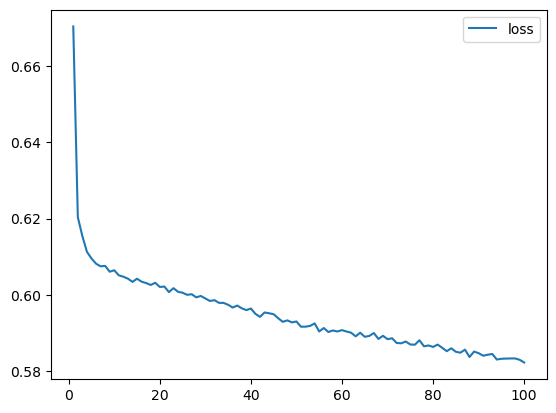

In [124]:
model_plot.plot(y="loss")

<AxesSubplot:>

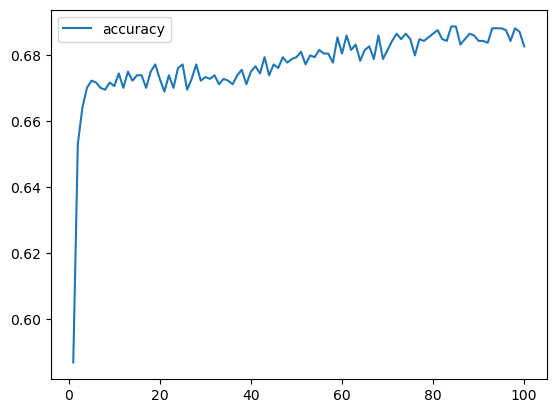

In [125]:
model_plot.plot(y="accuracy")

In [116]:
# Training data results

In [117]:
model_loss, model_accuracy = nn.evaluate(X_train_scaled, y_train, verbose=2)

1822/1 - 0s - loss: 0.5607 - accuracy: 0.6910


In [118]:
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.5814576712319408, Accuracy: 0.690998911857605


In [119]:
# Testing data results

In [120]:
test_model_loss, test_model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

608/1 - 0s - loss: 0.6387 - accuracy: 0.6431


In [121]:
print(f"Loss: {test_model_loss}, Accuracy: {test_model_accuracy}")

Loss: 0.6292084769198769, Accuracy: 0.6430920958518982
